# Data Preprocessing and Feature Engineering

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import talib
import os

In [35]:
# Load the data
def load_data(directory='/Users/priyanshsingh/Developer/Projects/Advanced-Stocks/data'):
    all_data = {}
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            bse_code = filename.split('.')[0]  # Extract BSE code from filename
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
            all_data[bse_code] = df
    return all_data

In [36]:
# Load all stock data
stock_data = load_data()

In [37]:
# Select a specific stock for analysis (e.g., the first one in the list)
selected_bse_code = list(stock_data.keys())[0]
df = stock_data[selected_bse_code]

In [38]:
print(f"Analyzing stock with BSE code: {selected_bse_code}")
print(f"Original dataframe shape: {df.shape}")
print("\nFirst few rows of original data:")
print(df.head())

Analyzing stock with BSE code: 500033
Original dataframe shape: (2473, 12)

First few rows of original data:
            Open Price  High Price  Low Price  Close Price          WAP  \
Date                                                                      
2023-08-28     3498.80     3506.45    3404.00      3415.00  3447.860488   
2023-08-25     3599.95     3649.25    3396.00      3441.85  3515.589407   
2023-08-24     3454.95     3573.45    3422.95      3573.45  3552.271658   
2023-08-23     3419.95     3451.00    3383.00      3403.30  3408.239115   
2023-08-22     3429.00     3429.00    3380.00      3402.60  3400.747967   

            No.of Shares  No. of Trades  Total Turnover (Rs.)  \
Date                                                            
2023-08-28          3032            701            10453913.0   
2023-08-25          5721           1176            20112687.0   
2023-08-24          8842            602            31409186.0   
2023-08-23          1401            307 

In [39]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         8
% Deli. Qty to Traded Qty    8
Spread High-Low              0
Spread Close-Open            0
dtype: int64


In [40]:
# Handle missing values
df['Deliverable Quantity'].fillna(df['Deliverable Quantity'].median(), inplace=True)
df['% Deli. Qty to Traded Qty'].fillna(df['% Deli. Qty to Traded Qty'].median(), inplace=True)

In [41]:
# Create technical indicators
df['RSI'] = talib.RSI(df['Close Price'], timeperiod=14)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close Price'], fastperiod=12, slowperiod=26, signalperiod=9)
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['Close Price'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

# Generate lagged features
df['Lag_1_Close'] = df['Close Price'].shift(1)
df['Lag_2_Close'] = df['Close Price'].shift(2)
df['Lag_1_Volume'] = df['No.of Shares'].shift(1)
df['Lag_2_Volume'] = df['No.of Shares'].shift(2)

# Calculate returns
df['Daily_Return'] = df['Close Price'].pct_change()

In [42]:
# Drop NaN values
df.dropna(inplace=True)

In [43]:
print(f"\nProcessed dataframe shape: {df.shape}")
print("\nFirst few rows of processed data:")
print(df.head())


Processed dataframe shape: (2440, 24)

First few rows of processed data:
            Open Price  High Price  Low Price  Close Price          WAP  \
Date                                                                      
2023-07-11     2531.00     2652.95     2531.0      2593.20  2602.932158   
2023-07-10     2578.85     2589.60     2520.8      2537.30  2555.790788   
2023-07-07     2602.05     2634.95     2550.0      2578.80  2582.220454   
2023-07-06     2545.00     2649.50     2530.0      2618.75  2609.127662   
2023-07-05     2613.05     2659.40     2465.0      2492.25  2521.884075   

            No.of Shares  No. of Trades  Total Turnover (Rs.)  \
Date                                                            
2023-07-11          6294           1505            16382855.0   
2023-07-10          5927            811            15148172.0   
2023-07-07          7099           1240            18331183.0   
2023-07-06         10943           1911            28551684.0   
2023-07-05

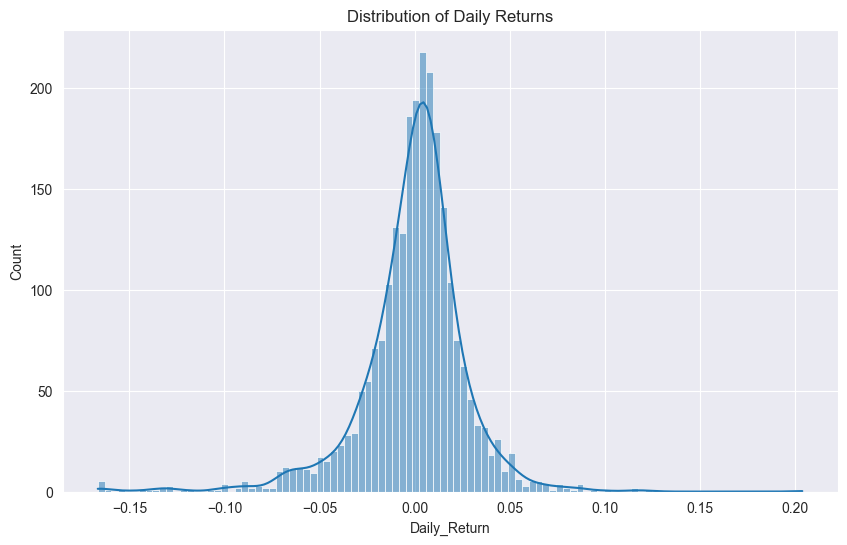

In [44]:
# Visualize the distribution of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Return'], kde=True)
plt.title('Distribution of Daily Returns')
plt.show()

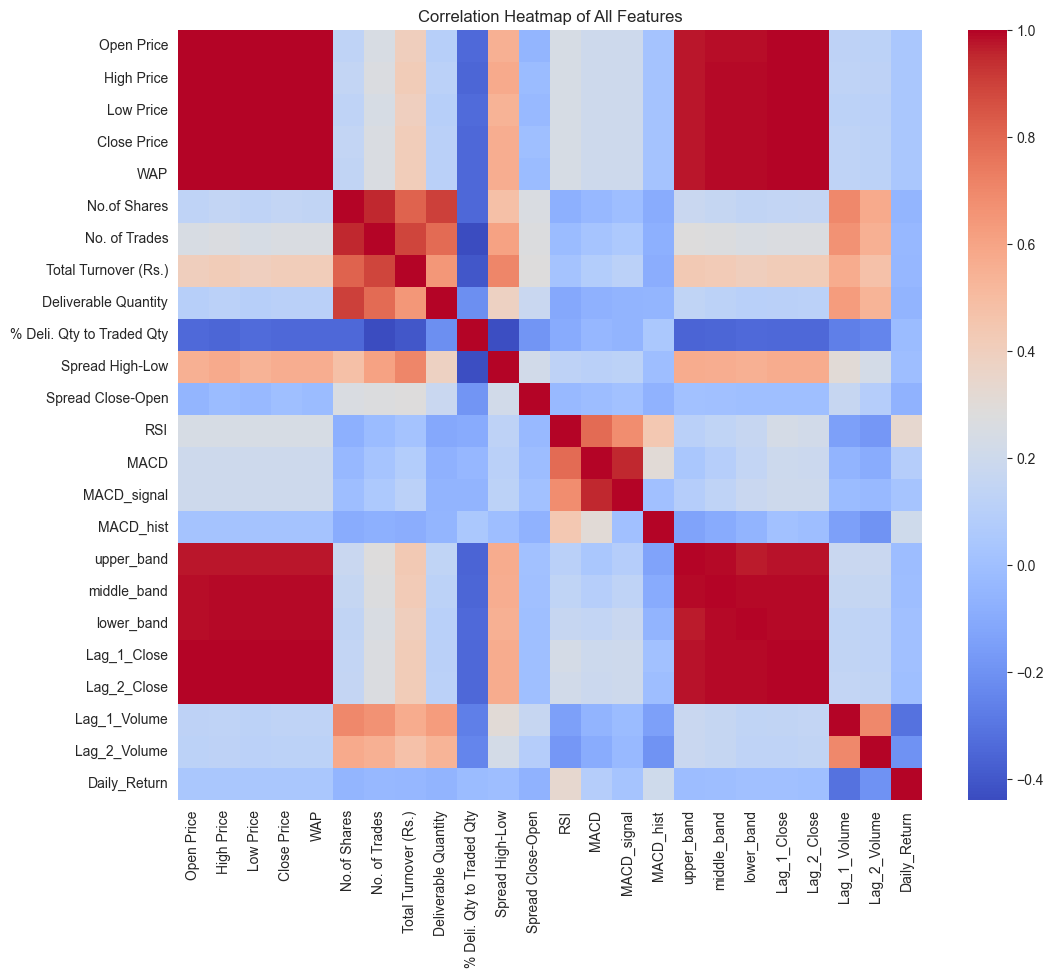

In [45]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of All Features')
plt.show()

In [46]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['Close Price', 'Daily_Return'], axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=df.drop(['Close Price', 'Daily_Return'], axis=1).columns, index=df.index)
scaled_df['Close Price'] = df['Close Price']
scaled_df['Daily_Return'] = df['Daily_Return']

print("\nFirst few rows of scaled data:")
print(scaled_df.head())


First few rows of scaled data:
            Open Price  High Price  Low Price       WAP  No.of Shares  \
Date                                                                    
2023-07-11    0.581383    0.646479   0.617016  0.640710     -0.394194   
2023-07-10    0.623352    0.591755   0.607955  0.599438     -0.397104   
2023-07-07    0.643700    0.630930   0.633893  0.622577     -0.387812   
2023-07-06    0.593662    0.643499   0.616127  0.646135     -0.357333   
2023-07-05    0.653348    0.652051   0.558389  0.569752     -0.365032   

            No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
Date                                                                    
2023-07-11      -0.373680             -0.392670             -0.411303   
2023-07-10      -0.471598             -0.397117             -0.400169   
2023-07-07      -0.411070             -0.385652             -0.417180   
2023-07-06      -0.316397             -0.348840             -0.381351   
2023-07-05      -0

In [47]:
# Save preprocessed data
scaled_df.to_csv(f'preprocessed_{selected_bse_code}.csv')
print(f"\nPreprocessed data saved to preprocessed_{selected_bse_code}.csv")


Preprocessed data saved to preprocessed_500033.csv
